<a href="https://colab.research.google.com/github/BlazeIngithub/BlazeIngithub/blob/main/01_Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Pytorch workflow**

In [35]:
import torch
from torch import nn # nn contains all the pytorch's building blocks for neaural networks
import matplotlib.pyplot as plt

#check pytorch version

torch.__version__


'2.8.0+cu126'

## Data preparing and loading

* Excel spreadsheet
* Image of any kind
* Videos
* Audio like songs or podcast
* DNA
* Text etc

Machine learning is a game of 2 parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation

To showcase this, let's recreate some *known* data using the linear regression fromula

We'll use a linear regression formula to make a straight like with known parameters

In [36]:
#create *known* parameters

weight= 0.7
bias= 0.3

#create

start= 0
end= 1
step= 0.02
X= torch.arange(start, end, step).unsqueeze(dim=1)
Y= weight* X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [37]:
len(X), len(Y)

(50, 50)

### Splitting data into training and test

> let's create a training and test data



In [38]:
#create train test split

train_split= int(0.8 * len(X))

train_split

40

In [39]:
X_train, Y_train= X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split: ]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [40]:
#Building a function to visualise our model
def plot_predictions(train_data= X_train,
                     train_labels=Y_train,
                     test_data= X_test,
                     test_labels= Y_test,
                     predictions= None):

  """
  Plots training data and test data and compares predictions
  """
  plt.figure(figsize=(10, 7))

#plot training data in blue

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

#plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data"  )

#Are there predictions

  if predictions is not None:
  #plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s= 4, label= "predictions")

#show the legends

  plt.legend(prop={"size": 14});

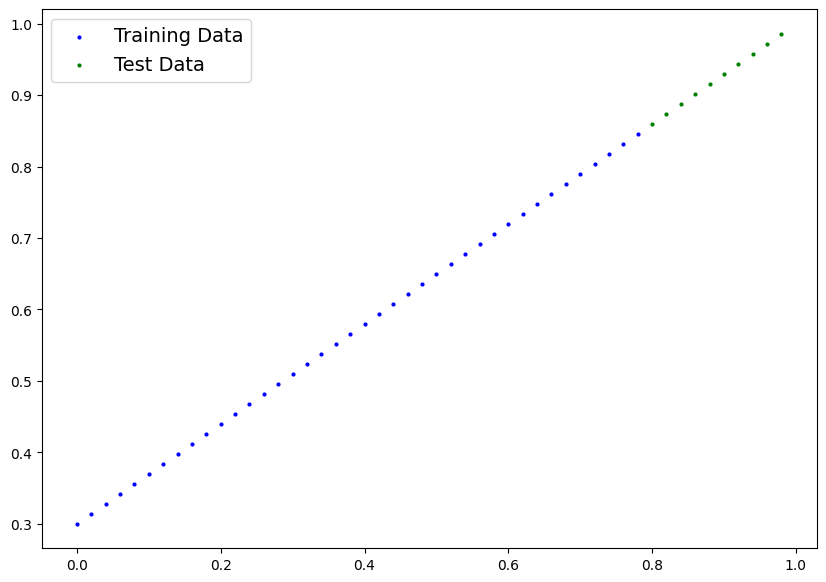

In [41]:
plot_predictions()

2. Build Model

Our first Pytorch Model!

Prequisite- OOP- https://realpython.com/python-classes/#defining-a-class-in-python


What our model does:
* start with random values(weight and bias)
* Look at the training and adjust the random values to better represent the ideal values(the weight and biase value we use to create the data)

How does it do so?

Through two main algorith:
1. Gradient descent
2. Backpropagation


In [42]:
#Create Linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight= nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias= nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

#forward method to define computation in the model

  def forward(self, x: torch.tensor)->torch.tensor: #<- "x" is the input data
    return self.weight* x + self.bias  #this is a linear regression formula



### Pytorch model building essentials

* **torch.nn** - contains all the builds for for computational graps(a neaural network can be consider a computational grap)
* **torch.nn.Parameter** - what paramer should our model try and learn, often a pytorch Layer from torch.nn will set these for us.
* **torch.nn.Module**- Base class for all neaural network modules
* **torch.optim**- Optimiser in pytorch
* **def forward()** - all nn.Module subclassed require you to overwrite  



### Checking the content of a pytorch model

Now we have created a model let's see what inside our model using .parameter()

In [43]:
# Create a random seed

torch.manual_seed(42)

#create an instance of the model(this is a subclass of nn.Module)

model_0= LinearRegressionModel()

#check out the parameters

list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [44]:
# List names parameter
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [45]:
weight, bias #our goal is to get this value as much as we can

(0.7, 0.3)

### Making prediction using 'torch.inference_mode()'

To check our model's predictive power, let's see how well it predict 'y_test' based on 'x_test'

When we pass data through our model it is going to run it through the forward() method

In [46]:
#Make predictions with Model

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [47]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

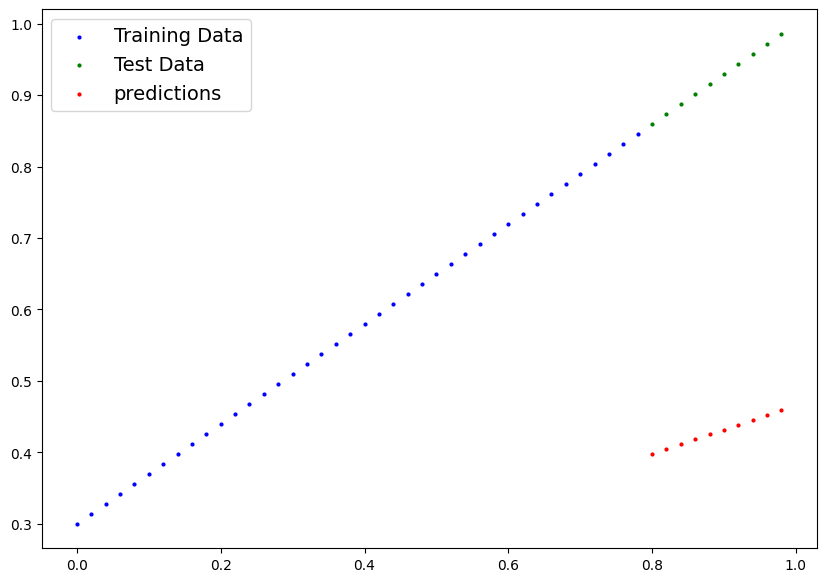

In [48]:
plot_predictions(predictions= y_preds)

### Train Model

The whole idea of training for a model to move from some unkown parameters(these may be random) to some known parameters

Or in other words from a poor representation of a data to better representation

* Note: Loss function may also be called cost functions or creterion in different area. for our case, we're are going to refer it as Loss function

* **Optimizer** takes into account the loss model to adjust the model parameters(e.g. weights, bias)

And specifically for pytorch, we need:
  * training loop
  * a testing loop

In [49]:
# setup a loss function

loss_fn = nn.L1Loss()

#setup and optimizer

optimizer= torch.optim.SGD(params= model_0.parameters(), lr=0.01) #lr= learning rate= possibility of most important hyper parameter

Q.What loss function and optimizer should I use?
A. This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

for eg, for regression problem, a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffic.

But for a classification problem like classifying whethere a photo is of a dog or cat, you'll likely want to use a loss function of nn.BCELoss()- Binary cross entropy loss

### Building a training loop(and a testing loop) in pytorch

A couple of things we need in a training loop
0. loop through data
1.   forward pass - this involve data moving through our model to make predictions on data- also forward propagation
2.   calculate the loss(compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss Backward- move backward through the network to calculate the gradients of each of the parameter of our model with respect to the loss- **Back propagation**
5. Optimizer step- use the optimizer to adjust our model's paramets to try and improve the loss (**gradient descent**)





In [50]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [51]:
torch.manual_seed(42)

# An epoch is one loop through the data...(this is a hyperparameter because we've set it)

epochs= 100

#0. Loop through the training data

for epoch in range(epochs):
  #set the model to training mode
  model_0.train()   #train mode in pytorh set all parameter that require gradient

  #1. forward pass

  y_pred= model_0(X_train)

  #2. Calculate the loss
  loss= loss_fn(y_pred, Y_train)
  print(f"Loss- {loss}")

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. Perform back propagation on the loss with respect to the parameter of the model
  loss.backward() #by default how the optimizer changes will accumulate through the loop....we have to zero them above in step 3 for the next iteration of the loop

  #5. step the optimizer(perform gradient descend)
  optimizer.step()


Loss- 0.31288138031959534
Loss- 0.3013603389263153
Loss- 0.28983935713768005
Loss- 0.2783183455467224
Loss- 0.26679736375808716
Loss- 0.2552763521671295
Loss- 0.24375534057617188
Loss- 0.23223432898521423
Loss- 0.22071333229541779
Loss- 0.20919232070446014
Loss- 0.1976713240146637
Loss- 0.18615034222602844
Loss- 0.1746293306350708
Loss- 0.16310831904411316
Loss- 0.1515873372554779
Loss- 0.14006635546684265
Loss- 0.1285453587770462
Loss- 0.11702437698841095
Loss- 0.1060912236571312
Loss- 0.09681284427642822
Loss- 0.08908725529909134
Loss- 0.08227583020925522
Loss- 0.07638873159885406
Loss- 0.07160007208585739
Loss- 0.06747635453939438
Loss- 0.06395438313484192
Loss- 0.06097004935145378
Loss- 0.05845819041132927
Loss- 0.05635259300470352
Loss- 0.0545857772231102
Loss- 0.053148526698350906
Loss- 0.05181945487856865
Loss- 0.05069301277399063
Loss- 0.0498228520154953
Loss- 0.04895269125699997
Loss- 0.04819351062178612
Loss- 0.047531817108392715
Loss- 0.04692792519927025
Loss- 0.046423316001

In [52]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [53]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

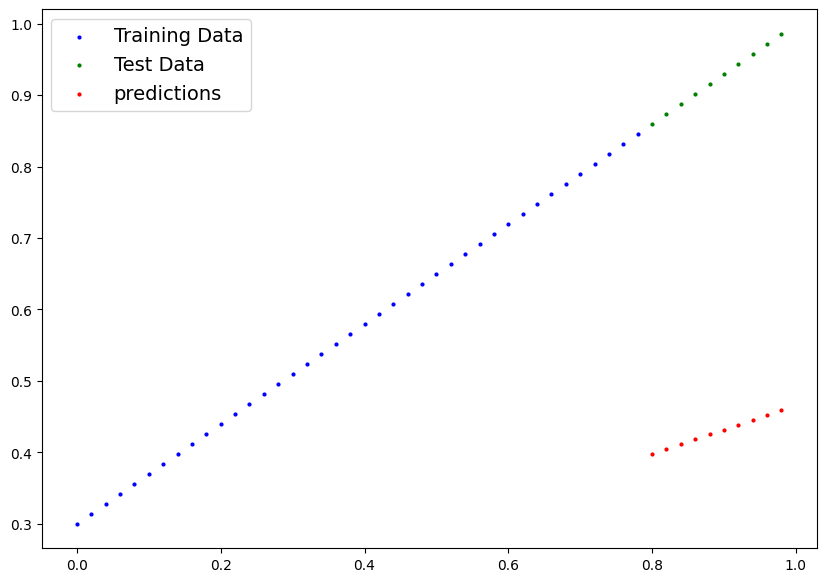

In [54]:
plot_predictions(predictions= y_preds);

In [55]:
torch.manual_seed(42)

epochs = 200

#Track different values

epoch_count= []
loss_values= []
test_loss_values= []

for epoch in range(epochs+1):  # loop from 0 to 100
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, Y_train)

    # update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # evaluation step
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, Y_test)

    # print every 10 epochs
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss )
        print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")


Epoch: 0 | Train Loss: 0.0245 | Test Loss: 0.0565
Epoch: 10 | Train Loss: 0.0210 | Test Loss: 0.0482
Epoch: 20 | Train Loss: 0.0176 | Test Loss: 0.0406
Epoch: 30 | Train Loss: 0.0142 | Test Loss: 0.0323
Epoch: 40 | Train Loss: 0.0107 | Test Loss: 0.0241
Epoch: 50 | Train Loss: 0.0073 | Test Loss: 0.0165
Epoch: 60 | Train Loss: 0.0039 | Test Loss: 0.0082
Epoch: 70 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 80 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 90 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 100 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 110 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 120 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 130 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 140 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 150 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 160 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 170 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 180 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 190 | Train Loss

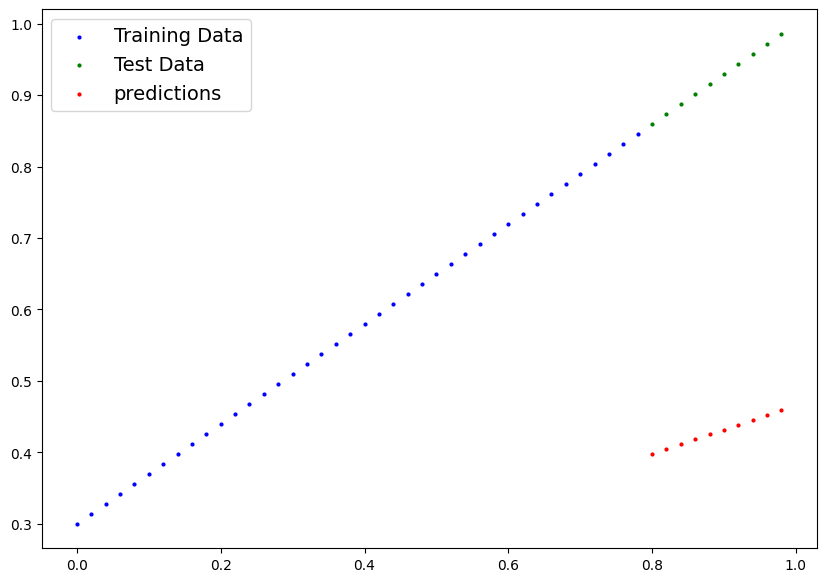

In [56]:
plot_predictions(predictions= y_preds);

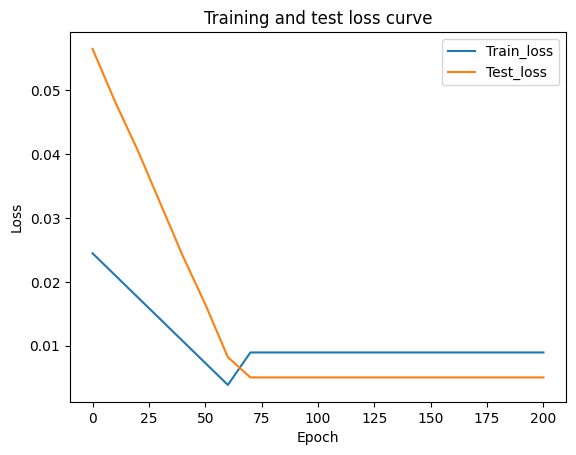

In [57]:
#Plot the loss curve

import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label= "Train_loss")
plt.plot(epoch_count, test_loss_values, label= "Test_loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();



### Saving the model

>There are 3 main methods you should about for saving and loading in pytorch
1. torch.save() - allow you to savea  pytorch Object in python's pickle forma
2. torch.load()- allows you to save pytorch object
3. torch.nn.Module.load_state_dict()- this allow you to model save state dict



In [58]:
#Saving our pytorch Model

from pathlib import Path


#1 create a model directory

MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok=True)

#2. Create model save path

MODEL_NAME= "01_Pytorch_workflow.pth"

MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

#3. Save the model state dict

print(f"Saving Model to: {MODEL_SAVE_PATH} ")

torch.save(obj= model_0.state_dict(), f=MODEL_SAVE_PATH)






Saving Model to: models/01_Pytorch_workflow.pth 


In [59]:
!ls -1 models

01_Pytorch_workflow.pth


In [60]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])

### Loading a Pytorch model

Since we have saved our model's state_dict() rather than the entire model, we will create a new instance of our model class and load the saved state_dict() into that

In [61]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [62]:
# To laod in saved state_dict() we have to instantiate a new instance of our model class

loaded_model_0= LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))




<All keys matched successfully>

In [63]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [64]:
#Make some prediction with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds= loaded_model_0(X_test)

loaded_model_preds


tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [65]:
#make some model preds

model_0.eval()
with torch.inference_mode():
  y_preds= model_0(X_test)

y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [66]:
y_preds== loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

###Putting it all together

Let's go back through  the steps above and see it all in one place

  


In [67]:
#import Pytorch and matplotib

import torch
import matplotlib.pyplot as plt
from torch import nn

#check device version

torch.__version__

'2.8.0+cu126'

### Create device agnostic code.

This means if we've got access to a GPU, our code will use it(for potentially faster computing)

If no gpu is available, the code will defaul to using CPU

In [68]:
#setup device agnostic code

device= "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cuda


In [69]:
!nvidia-smi

Sat Sep 13 09:00:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [70]:
### Data

In [72]:
#create some data using using linear regression formula of y= weight * X + Bias

weight= 0.7
bias= 0.3

#create range value

start= 0
end= 1
step= 0.02

#Create X and y features

X= torch.arange(start, end, step).unsqueeze(dim=1) #without unsqueeze error will occur

y= weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [75]:
#split the data

train_split= int(0.8*len(X))
X_train, y_train= X[:train_split], y[:train_split]
X_test, y_test= X[train_split: ], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [77]:
#Building a function to visualise our model
def plot_predictions(train_data= X_train,
                     train_labels=Y_train,
                     test_data= X_test,
                     test_labels= Y_test,
                     predictions= None):

  """
  Plots training data and test data and compares predictions
  """
  plt.figure(figsize=(10, 7))

#plot training data in blue

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

#plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data"  )

#Are there predictions

  if predictions is not None:
  #plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s= 4, label= "predictions")

#show the legends

  plt.legend(prop={"size": 14});

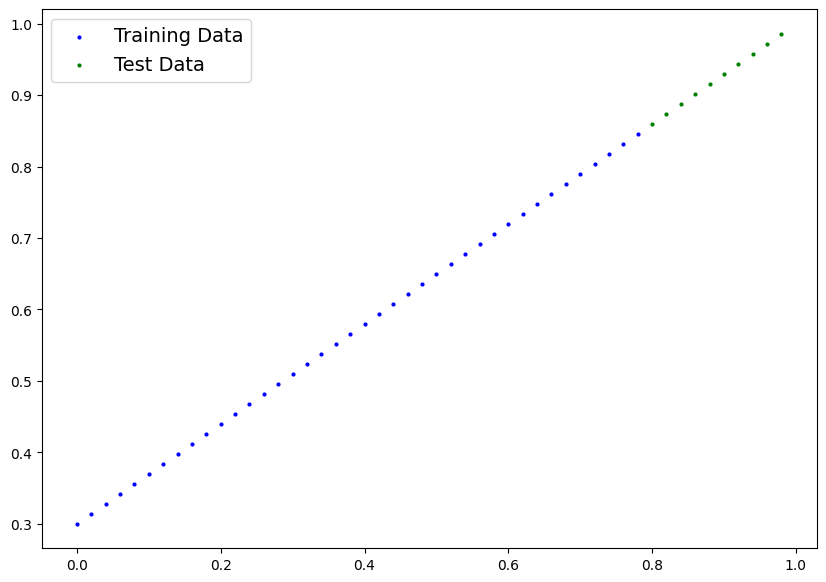

In [76]:
#plot the data
#Note: If ou don't  have the plot_predictions() function loaded it will through an error

plot_predictions(X_train, y_train,X_test, y_test)

### Building a pytorch Linear Model

In [90]:
# Create a linear model by subclassing the nn.module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model parameters/ Also called: linear transform, probing layer, fully connected layer, dense layer

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#Set manual seed

torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [91]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [92]:
#Check the model current device

next(model_1.parameters()).device

device(type='cpu')

In [93]:
#Set the model to use the target device

model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training

1. Loss functions
2. optimizer
3. Training Loop
4. Testing loop



In [94]:
#set up loss function
loss_fn= nn.L1Loss() #same a MAE

#setup our optimizer

optimizer= torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [95]:
#let's write a training loop

torch.manual_seed(42)

epochs= 200

#put data on the target device
X_train= X_train.to(device)
y_train= y_train.to(device)
X_test= X_test.to(device)
y_test= y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #forward pass
  y_pred= model_1(X_train)

  #calculate the loss
  loss= loss_fn(y_pred, y_train)

  #Optimizer zero grad

  optimizer.zero_grad()

  #back propagation

  loss.backward()

  #optimize the parameter

  optimizer.step()

  #testing

  model_1.eval()

  with torch.inference_mode():
    test_pred= model_1(X_test)

    test_loss= loss_fn(test_pred, y_test)

  #printout what's happenig

  if epoch % 10 ==0:
    print(f"Epoch:{epoch}|Loss:{loss}| test Loss:{test_loss}" )



Epoch:0|Loss:0.5551779866218567| test Loss:0.5739762187004089
Epoch:10|Loss:0.439968079328537| test Loss:0.4392664134502411
Epoch:20|Loss:0.3247582018375397| test Loss:0.30455657839775085
Epoch:30|Loss:0.20954833924770355| test Loss:0.16984669864177704
Epoch:40|Loss:0.09433845430612564| test Loss:0.03513690456748009
Epoch:50|Loss:0.023886388167738914| test Loss:0.04784907028079033
Epoch:60|Loss:0.019956795498728752| test Loss:0.045803118497133255
Epoch:70|Loss:0.016517987474799156| test Loss:0.037530567497015
Epoch:80|Loss:0.013089174404740334| test Loss:0.02994490973651409
Epoch:90|Loss:0.009653178043663502| test Loss:0.02167237363755703
Epoch:100|Loss:0.006215683650225401| test Loss:0.014086711220443249
Epoch:110|Loss:0.00278724217787385| test Loss:0.005814164876937866
Epoch:120|Loss:0.0012645035749301314| test Loss:0.013801801018416882
Epoch:130|Loss:0.0012645035749301314| test Loss:0.013801801018416882
Epoch:140|Loss:0.0012645035749301314| test Loss:0.013801801018416882
Epoch:150|L

In [96]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### Making and evaluating Predictions

In [100]:
#Turn model into evaluation mode

model_1.eval()

# make predictions on the test data

with torch.inference_mode():
  y_preds= model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

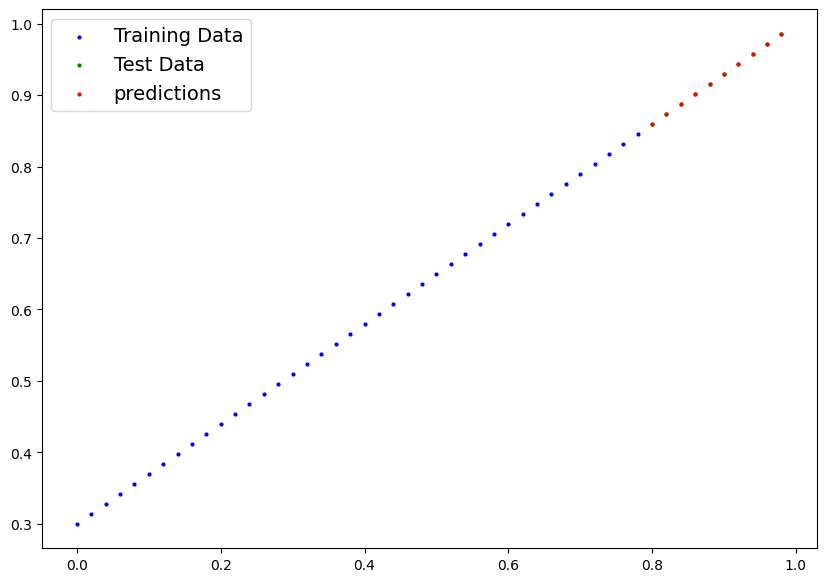

In [103]:
#Check out our model predictions visually

plot_predictions(predictions= y_preds.cpu())

###Saving and loading the model





In [107]:
from pathlib import Path

#create a model directory

MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok= True)


#2. Create a model save path

MODEL_NAME= "01_Pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH= MODEL_PATH/ MODEL_NAME

#Save the model state dict

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj= model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_Pytorch_workflow_model_1.pth


In [108]:
#Load a Pytorch Model

# create a new instance of linear regression model V2
loaded_model_1= LinearRegressionModelV2()

#laod the save model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#put the loaded model to device

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [109]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [110]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [111]:
#Evaluate loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds= loaded_model_1(X_test)

y_preds== loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')